In [551]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import sys
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster import xmeans
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer_multidim
sys.path.insert(1, '/Users/francescogemignani/Google Drive/DM2/_FMA/git/DataMining-2')
from fma_metadata import utils

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 5)

In [552]:
echonest = utils.load("/Users/francescogemignani/Google Drive/DM2/_FMA/fma_metadata/echonest.csv")
tracks = utils.load("/Users/francescogemignani/Google Drive/DM2/_FMA/fma_metadata/tracks.csv")

In [553]:
echo = echonest['echonest','audio_features'].merge(tracks['track'][['genre_top']],on='track_id')
echo.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Pop
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop


In [554]:
echo['genre_top'].value_counts()

Rock                   3892
Electronic             2170
Hip-Hop                 910
Folk                    874
Old-Time / Historic     357
Pop                     346
Classical               265
Jazz                    241
International           133
Instrumental             84
Blues                    66
Experimental             17
Spoken                    0
Soul-RnB                  0
Easy Listening            0
Country                   0
Name: genre_top, dtype: int64

In [555]:
echo = echo[echo['genre_top'].isin(['Hip-Hop'])]
echo.drop('genre_top',axis=1,inplace=True)
echo.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
583,0.748986,0.765886,0.513173,0.957209,0.614844,0.886914,180.025,0.401672


In [556]:
echo.shape

(910, 8)

https://pyclustering.github.io/docs/0.9.0/html/dc/d6b/classpyclustering_1_1cluster_1_1cluster__visualizer__multidim.html
https://pyclustering.github.io/docs/0.9.0/html/dd/db4/classpyclustering_1_1cluster_1_1xmeans_1_1xmeans.html

In [557]:
scaler = StandardScaler()
X = scaler.fit_transform(echo)

In [558]:
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(X, amount_initial_centers).initialize()

In [559]:
# performs cluster analysis using X-Means
xmeans_instance = xmeans.xmeans(X, initial_centers)
xmeans_instance.process()

In [560]:
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

visualizer.show() non funziona! Errore comune, provo come nel jpnb di guidotti

In [561]:
echo.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [562]:
def gshow(x,y):
    plt.title("Echonest Audio-Features: Hip-Hop")
    plt.xlabel(x)
    plt.ylabel(y)
    for indexes in clusters:
        plt.scatter(X[indexes,i], X[indexes,j], alpha=0.4)
    for c in centers:
        plt.scatter(c[i], c[j], s=100, edgecolors='k')

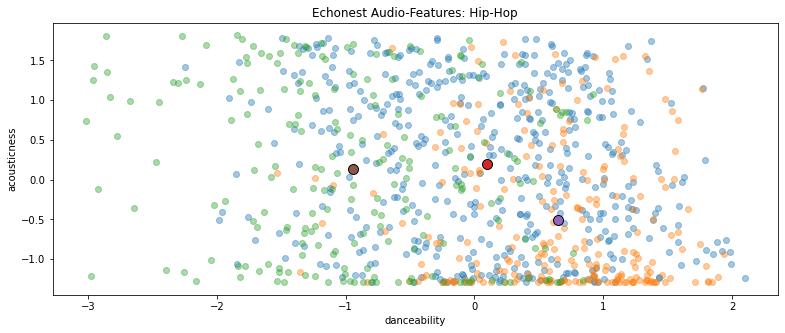

In [563]:
i = echo.columns.values.tolist().index('danceability')
j = echo.columns.values.tolist().index('acousticness')
gshow("danceability","acousticness")

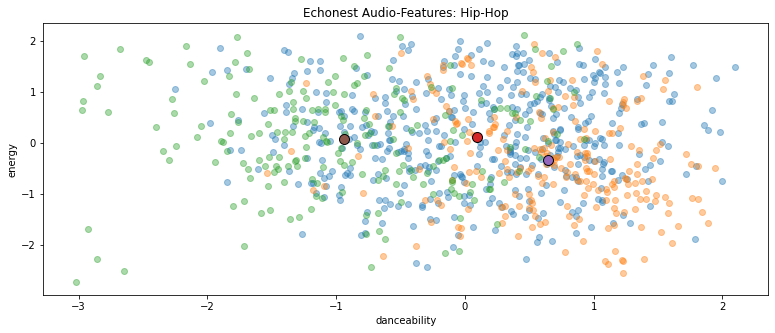

In [564]:
i = echo.columns.values.tolist().index('danceability')
j = echo.columns.values.tolist().index('energy')
gshow("danceability","energy")

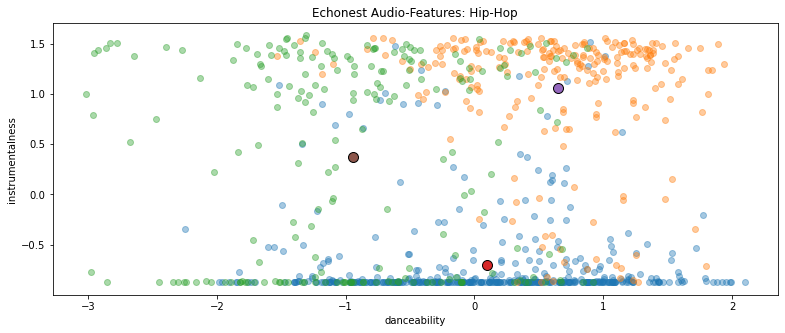

In [565]:
i = echo.columns.values.tolist().index('danceability')
j = echo.columns.values.tolist().index('instrumentalness')
gshow("danceability","instrumentalness")

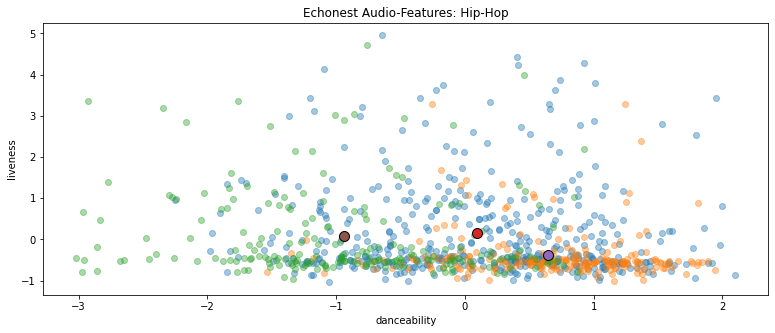

In [566]:
i = echo.columns.values.tolist().index('danceability')
j = echo.columns.values.tolist().index('liveness')
gshow("danceability","liveness")

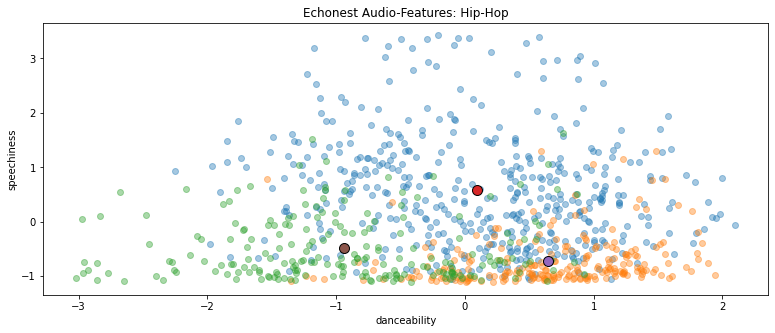

In [567]:
i = echo.columns.values.tolist().index('danceability')
j = echo.columns.values.tolist().index('speechiness')
gshow("danceability","speechiness")

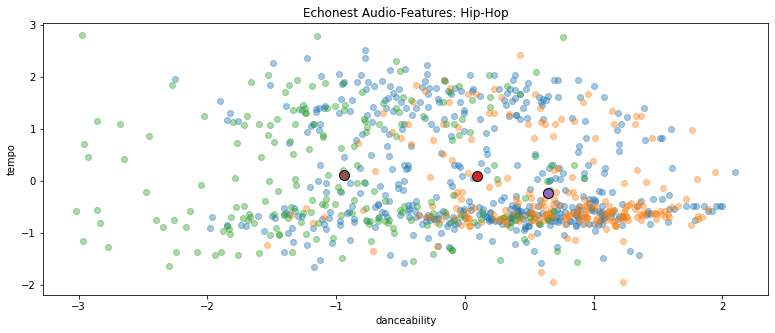

In [568]:
i = echo.columns.values.tolist().index('danceability')
j = echo.columns.values.tolist().index('tempo')
gshow("danceability","tempo")

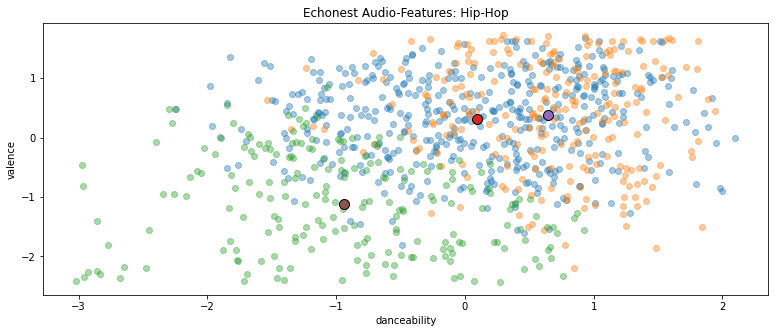

In [569]:
i = echo.columns.values.tolist().index('danceability')
j = echo.columns.values.tolist().index('valence')
gshow("danceability","valence")